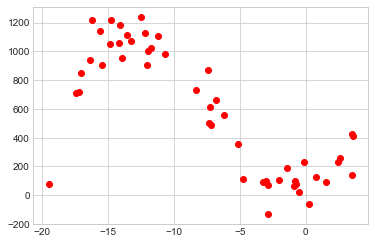

In [1]:
# Simulated data is given as follows in Python:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-whitegrid')
noise_scale = 100
number_of_samples = 50
x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.plot(x,y,'ro')

m = 5


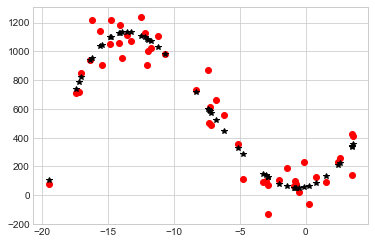

In [2]:
# ======================================================================================
# 1) Please plot the noisy data and the polynomial you found (in the same figure). 
# You can use any value of m selected from 2, 3, 4, 5, 6.
# ======================================================================================

m=np.random.choice([2,3,4,5,6]) # randomly selected m from choices provided
print('m =', m)
curve = np.polyfit(x.flatten(),y.flatten(),m) # list of x, list of y, degree = m
polyn = np.poly1d(curve)    # polynomial created for generating clean y for each x

plt.plot(x,y,'ro')
plt.plot(x,polyn(x),'k*')

Least MSE in testing set is for m= 4
Least MSE in training for m= 8
Therefore, m for which MSE for training and testing set is closest is m = 4 MSE difference is = 6795.4866396162615


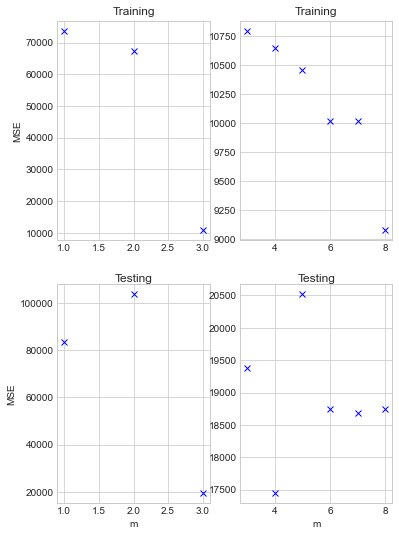

In [3]:
# ======================================================================================
# 2) Plot MSE versus order m, for m = 1, 2, 3, 4, 5, 6, 7, 8 respectively. 
# Identify the best choice of m.
# ======================================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)
m_list = [1,2,3,4,5,6,7,8]
MSE_list_training = []
MSE_list_testing  = []

for m in m_list:
    curve = np.polyfit(X_train.flatten(),Y_train.flatten(),m)        # only working with training data 
    y_predicted = np.poly1d(curve)                                   # to fit curve
    MSE = np.square(np.subtract(Y_test,y_predicted(X_test))).mean()     # MSE calculated on testing data
    MSE_list_testing.append(MSE)                               # storing MSE for plot against m
    MSE_list_training.append(np.square(np.subtract(Y_train,y_predicted(X_train))).mean())

# Plot    
fig,a = plt.subplots(2,2, squeeze=False)
a[0, 0].plot(m_list[:3], MSE_list_training[:3], 'bx')   # subplot for m=1 to m=3
a[0, 0].set_title('Training')
a[0, 1].plot(m_list[2:], MSE_list_training[2:], 'bx')
a[0, 1].set_title('Training')
a[1, 0].plot(m_list[:3], MSE_list_testing[:3], 'bx')   # subplot for m=3 onwards, for more vivid display
a[1, 0].set_title('Testing', pad=1.08)
a[1, 1].plot(m_list[2:], MSE_list_testing[2:], 'bx')
a[1, 1].set_title('Testing', pad=1.08)
plt.subplots_adjust(top=1.8)
plt.setp(a[-1, :], xlabel='m')
plt.setp(a[:, 0], ylabel='MSE')

MSE_diff = [] # for list of difference 
for m, train, test in zip(m_list, MSE_list_training, MSE_list_testing):
    MSE_diff.append((abs(train-test), m))  # list of tuples created [((mse_train1-mse_test1), m1)  ((mse_train2-mse_test2), m2) ...]
                                           # min(MSE_diff) gives minimum magnitude diffference, implying best correspoding m                                        

# extracting index of least MSE, and getting corresponding m from m_list
print('Least MSE in testing set is for m=', m_list[MSE_list_testing.index(min(MSE_list_testing))])
print('Least MSE in training for m=', m_list[MSE_list_training.index(min(MSE_list_training))])
# extracting least difference of MSE, and corresponding m 
print('Therefore, m for which MSE for training and testing set is closest is m =', min(MSE_diff)[1], 'MSE difference is =', min(MSE_diff)[0])

Noise scale 	 MSE
150 	 19141.838983626363
200 	 50632.612087644426
400 	 108225.92827233693
600 	 262151.6497487159
1000 	 898451.7631273238


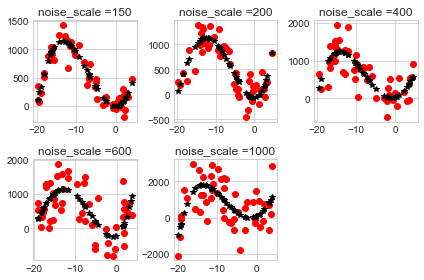

In [4]:
# ======================================================================================
# # Change variable noise_scale to 150, 200, 400, 600, 1000 respectively,
# # re-run the algorithm and plot the polynomials with the m found in 2).
# # Discuss the impact of noise scale to the accuracy of the returned parameters. 
# # [You need to plot a figure like in 1) for each choice of noise_scale.]
# ======================================================================================

noise_list = [150, 200, 400, 600, 1000]
number_of_samples = 50
m = 4      # found in 2
MSE_list = []

print('Noise scale \t MSE')
for index, noise_scale in enumerate(noise_list):
    x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
    y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)    
    curve = np.polyfit(x.flatten(), y.flatten(), m)       
    y_predicted = np.poly1d(curve)                                   
    MSE = np.square(np.subtract(y,y_predicted(x))).mean()     # MSE calculated 
    MSE_list.append(MSE)                              # storing MSE for comparison with noise_scale
    
    plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
    plt.subplot(2,3,index+1)
    plt.plot(x,y,'ro')                          # plotting test data and data predicted with m=4
    plt.plot(x,y_predicted(x),'k*')
    plt.title('noise_scale =' + str(noise_scale))
    plt.grid(True)
    print(noise_scale,'\t',MSE_list[index])  
    
# ==================================================================================================================================
# Discussion about results observed : 
#
# It is evident from the graphs generated that Mean Squared Error (MSE) increases exponentially as noise increases. 
# Thus we can conclude that the increase in noise scale generally leads to a massive increase in MSE 
# (or a decrease in precision of predicted values). 
# 
# Thus accuracy of predicted parameters decreases drastically with increase in noise range. 
# ==================================================================================================================================

Number of samples 	 	 MSE
40 			 9055.066391159336
30 			 5936.359855308003
20 			 9777.354271091459
10 			 3699.0680586460685


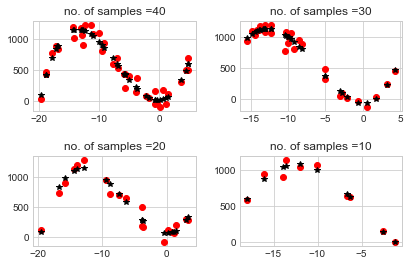

In [5]:
# =========================================================================================
# # Change variable number_of_samples to 40, 30, 20, 10 respectively, 
# # re-ran the algorithm and plot the polynomials with the m found in 2). 
# # Discuss the impact of the number of samples to the accuracy of the returned parameters. 
# # [You need to plot a figure like in 1) for each choice of number_of_samples.]
# # =======================================================================================

noise_scale = 100 # used initially
number_of_samples_list = [40, 30, 20, 10]
m = 4      # found in 2
MSE_list = []
print('Number of samples \t \t MSE')
for index, number_of_samples in enumerate(number_of_samples_list):
    x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
    y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
    curve = np.polyfit(x.flatten(), y.flatten(), m)        
    y_predicted = np.poly1d(curve)                                  
    MSE = np.square(np.subtract(y, y_predicted(x))).mean()     # MSE calculated
    MSE_list.append(MSE)                                # storing MSE for comparison with noise_scale
    #sub plots
    plt.tight_layout(pad=1.8, h_pad=None, w_pad=None, rect=None)
    plt.subplot(2,2,index+1)
    plt.plot(x,y,'ro')
    plt.plot(x,y_predicted(x),'k*')
    plt.title('no. of samples =' + str(number_of_samples))
    plt.grid(True)
    print(number_of_samples,'\t\t\t',MSE_list[index])  
    
# ==================================================================================================================================
# Discussion about results observed : 
#
# From the graphs we can observe a general increase in mean squared error, as the number of samples decrease.  
# However, since the factor of noise can oppose the effect of decrease in sample numbers, we also observe some anomalies, 
# where the MSE is abnormally higher or abnormally lower than expected for the corresponding number of samples. But, in general  
# we can see that there is an inverse relation between the MSE and number of samples.
# The anomalies have been discussed as follows:
# 
# For 40 samples' case, we can see that the noise has led to concentration of the data points, because of the random influence 
# of noise, which must be the reason for slightly higher MSE than expected for the number of samples. 
# In the case of 10 samples, as we can see from the graph, the predicted values have been incredibly precise. 
# This might be because the random values generated from noise are not great in terms of magnitude, 
# leading to lesser variance and hence lesser MSE. The curve is trying to overfit the data leading to lesser MSE than expected
# for small number of samples.
# 
# Thus, the accuracy of predicted parameters generally decreases with decrease in number of samples, especially for very low sample 
# numbers, but the influence of noise might significantly change the result. For very large number of samples, a increase in 
# MSE with decrease in number of samples in the data set.
# ==================================================================================================================================